
* Traditional NLP (text representation like BoW & TF-TDF, preprocessing and ML model)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df = pd.read_csv("twitter_training.csv")
test_df = pd.read_csv("twitter_test.csv")

## EDA

In [ ]:
train_df.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
3410,1791,CallOfDutyBlackopsColdWar,Irrelevant,Crazy Break
31736,7448,LeagueOfLegends,Negative,why do games always have to make the ugliest m...
38860,5470,Hearthstone,Negative,writing is not even right. Dragon Druid. youtu...
11131,13114,Xbox(Xseries),Negative,@ ArcAngel80 aka another XBOT just Blocked me ...
23856,4490,Google,Negative,"I, if my google meet does not work"


In [ ]:
test_df.sample(5)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
604,1439,Battlefield,Neutral,At the start of the gen we had these were a fe...
311,7384,LeagueOfLegends,Positive,League of Legends taught me to come to terms w...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
417,8805,Nvidia,Neutral,just re-installed NVidia drivers using this gu...
742,11610,Verizon,Negative,Funny how this issue is not HUGE during this p...


In [ ]:
train_df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [ ]:
test_df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

* Assign Names for eachdataframe

In [ ]:
train_df.columns = ["id", "company", "target", "text"]
test_df.columns = ["id", "company", "target", "text"]


In [ ]:
train_df

,id,company,target,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
60949,4847,GrandTheftAuto(GTA),Irrelevant,Whoever vandalizing the speed cameras around t...
60950,4847,GrandTheftAuto(GTA),Irrelevant,Whoever is vandalizing the speed cameras aroun...
60951,4847,GrandTheftAuto(GTA),Irrelevant,OH Whoever is vandalizing the video speed came...
60952,4847,GrandTheftAuto(GTA),Irrelevant,Whoever is mounting the speed cameras around f...


In [ ]:
test_df.sample(5)

,id,company,target,text
310,9415,Overwatch,Negative,What does everyone think of @PlayOverwatch ope...
849,10889,TomClancysGhostRecon,Negative,"Welp, #ghostreconbreakpoint 's immersive updat..."
641,5312,Hearthstone,Negative,@PlayHearthstone when do you guys thinking to ...
765,4275,CS-GO,Neutral,Don't jump me... @CSGO #CSGO\n\n🔗 medal.tv/cli...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [ ]:
train_df.drop("id", inplace=True, axis=1)
test_df.drop("id", inplace=True, axis=1)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(60954, 3)
(999, 3)


In [ ]:
print(f"Null_values: \n{train_df.isnull().sum()}")
print("##############################")
print(f"Null_values: \n{test_df.isnull().sum()}")


Null_values: 
company      0
target       0
text       554
dtype: int64
##############################
Null_values: 
company    0
target     0
text       0
dtype: int64


In [ ]:
train_df.dropna(inplace=True)

In [ ]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

2527
0


In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(train_df, test_size=0.1, random_state=42)
print(f"Train DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {validation_df.shape}")

Train DataFrame shape: (52085, 3)
Validation DataFrame shape: (5788, 3)


In [ ]:
# validation_df.to_csv("validation_df.csv", index=False)
# train_df.to_csv("train_df.csv", index=False)

In [ ]:
train_df.describe()

,company,target,text
count,52085,52085,52085
unique,27,4,51032
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2087,15203,59


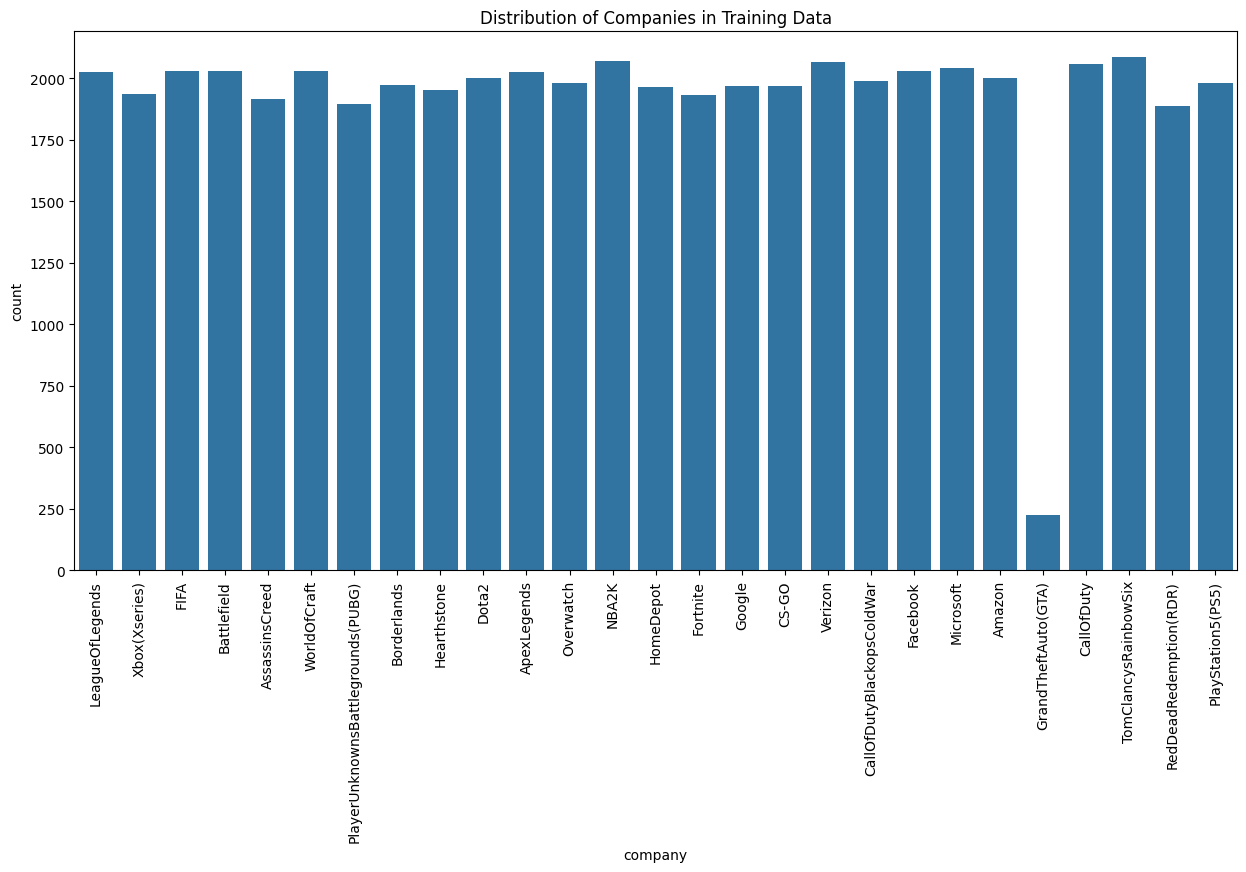

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='company')
plt.xticks(rotation=90)
plt.title('Distribution of Companies in Training Data')
plt.show()

In [ ]:
train_df["company"].value_counts()

,count
company,
TomClancysRainbowSix,2087
NBA2K,2071
Verizon,2067
CallOfDuty,2060
Microsoft,2044
Facebook,2032
Battlefield,2032
WorldOfCraft,2030
FIFA,2030


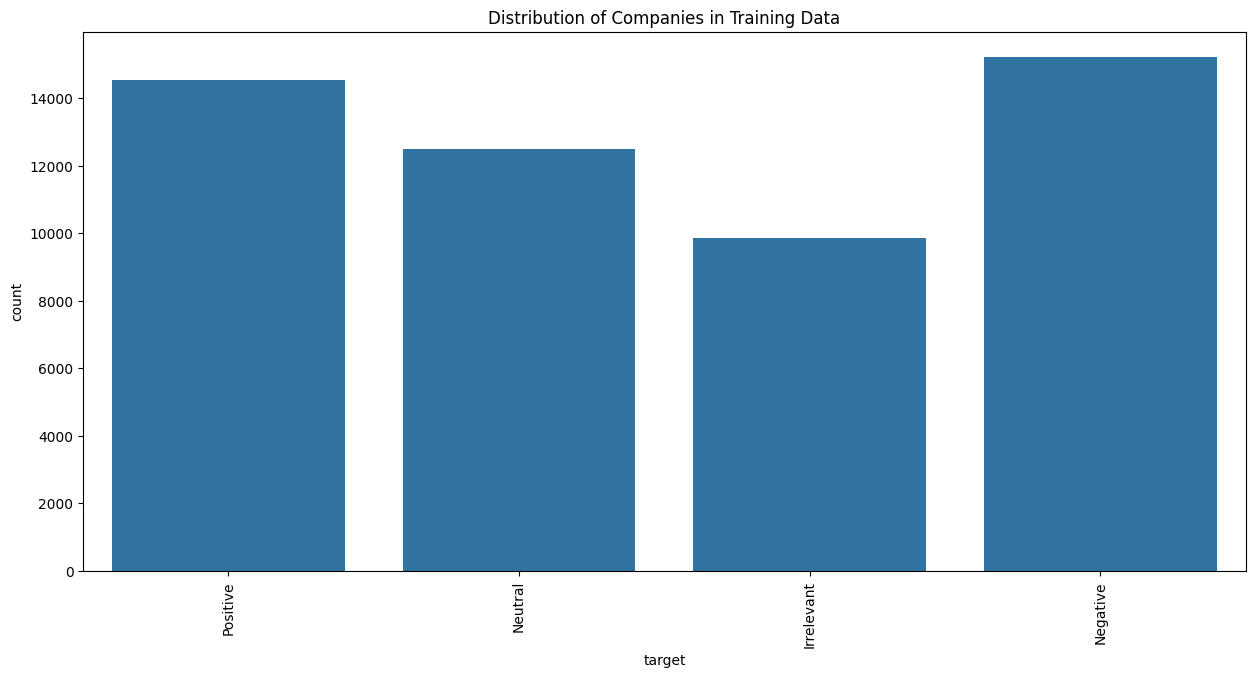

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df, x='target')
plt.xticks(rotation=90)
plt.title('Distribution of Companies in Training Data')
plt.show()

In [ ]:
train_df["target"].value_counts()

,count
target,
Negative,15203
Positive,14520
Neutral,12496
Irrelevant,9866


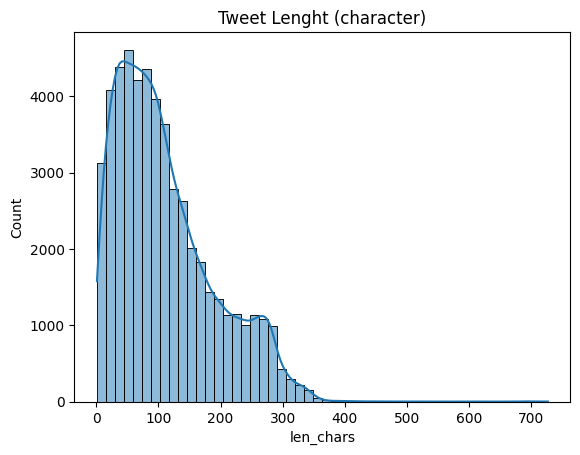

In [ ]:
train_df["len_chars"] = train_df["text"].str.len()
sns.histplot(data=train_df, x="len_chars",kde=True, bins=50)
plt.title("Tweet Lenght (character)")
plt.show()


In [ ]:
print("mean of len_chars", int(train_df["len_chars"].mean()))

mean of len_chars 110


### Traditional NLP (text representation like BoW & TF-TDF, preprocessing and ML model)


In [ ]:
train_df["text"].sample(5).tolist()


["Fuck that caster. I knew something's rotten with him",
 'Lol How accurate',
 "@PlayApex I'm having issues about board game stuttering. Have a 2070 super i7 32 gigs external ram 1-end motherboard x m.2 board. Anyone know why. Don't even it's a PC.",
 'xbox down again. definitely getting a ps5 fuck xbox fuck u microsoft fix ur shit console servers. im paying $20 a month to be able to play for maybe 2 weeks uninterrupted. shit fucking console. subscription should be $1 a month for how many fucking problems there are.',
 'Today, daddy got a sandwich, yesterday he went off home depot, cold heavy air wash a feeling of guilt over him. He checks his watch: 1:11. "Gah!", he sobs. "Now what?"']

* Preprocessing

In [ ]:
import nltk
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
# pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.9 MB/s eta 0:00:00


In [ ]:
import re
import emoji

In [ ]:
def clean_tweet(text, demojize=True, hashtag_handling='remove_symbol', remove_short_tokens=True):
    """
    Cleans a tweet by removing URLs, mentions, hashtags, emojis, numbers,
    special characters, short tokens, extra whitespace, and ellipsis patterns.
    """

    # emojis -> text
    if demojize:
        text = emoji.demojize(text)

    # remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)

    # remove mentions
    text = re.sub(r"@\w+", "", text)

    # hashtags
    if hashtag_handling == 'remove_all':
        text = re.sub(r"#\w+", "", text)
    elif hashtag_handling == 'remove_symbol':
        text = re.sub(r"#(\w+)", r"\1", text)

    # remove ellipsis "..."
    text = re.sub(r"\.{2,}", " ", text)

    # remove ^^
    text = re.sub(r"\^\^", "", text)

    # remove w/
    text = re.sub(r"w/", "", text)

    # remove numbers
    text = re.sub(r"\d+", "", text)

    # remove special characters (keep only letters + space)
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # normalize elongated words (coooool -> coool)
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)

    # remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # remove very short tokens (like "u", "n", "r")
    if remove_short_tokens:
        tokens = text.split()
        tokens = [t for t in tokens if len(t) > 2]  # keeps tokens >= 3 letters
        text = " ".join(tokens)

    return text


In [ ]:
tweet1 = "Check out this great library! 😊 https://pypi.org/project/emoji #Python #NLP @user123 and this is an example with ellipsis...."
print("Original Tweet: ===>",tweet1)
cleaned_tweet1 = clean_tweet(tweet1)
print("Without # Signs : ===>",cleaned_tweet1)
cleaned_tweet2 = clean_tweet(tweet1, hashtag_handling="remove_all")
print("Without # Signs&Words: ===>",cleaned_tweet2)

Original Tweet: ===> Check out this great library! 😊 https://pypi.org/project/emoji #Python #NLP @user123 and this is an example with ellipsis....
Without # Signs : ===> Check out this great library smilingfacewithsmilingeyes Python NLP and this example with ellipsis
Without # Signs&Words: ===> Check out this great library smilingfacewithsmilingeyes and this example with ellipsis


In [ ]:
examples = train_df["text"].sample(3).tolist() # Select random tweets and make on them cleaning

for example in examples:
  print("ORGIN:", example)
  print("ClEAN:", clean_tweet(example))
  print("==============================")

ORGIN: Time to get used to running Black Ops again has come to hang up and have a good time. tch.tv / thejkellz1.
ClEAN: Time get used running Black Ops again has come hang and have good time tchtv thejkellz
ORGIN: I'm not happy with the Bayern Munich game
ClEAN: not happy with the Bayern Munich game
ORGIN: Nor are they trying to be pillaged.
ClEAN: Nor are they trying pillaged


In [ ]:
from nltk.tokenize import word_tokenize
import string

In [ ]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))

In [ ]:
def tokenize_nltk(text):
  tokens = word_tokenize(text.lower())
  return [t for t in tokens if t not in stopwords_list and t not in string.punctuation]


# Calculate raw vocabulary size using NLTK (before cleaning)
raw_vocab_nltk = set(tokenize_nltk(" ".join(train_df["text"])))

In [ ]:
len(raw_vocab_nltk)

34309

In [ ]:
# Apply cleaning and then tokenize with NLTK
cleaned_sample_text_nltk = train_df["text"].map(clean_tweet)
clean_vocab_nltk = set(tokenize_nltk(" ".join(cleaned_sample_text_nltk)))


In [ ]:
len(clean_vocab_nltk)

30571

In [ ]:
def preprocess_tokens(text, remove_stopwords=True, replace_numbers=True):
  """
  1. we remove any link and mention and hashtag
  2. we convert text to lowercase
  3. we can replace numbers by
  4. we tokenize and remove punctuation
  5. we remove stop words
  """
  text = clean_tweet(text) # remove any patterns using regex
  text = text.lower() # casefolding
  if replace_numbers:
    # text = re.sub(r"\b\d+\b", "  ", text)
    text = re.sub(r"\b\d+\b", "", text)


  tokens = [t for t in word_tokenize(text) if t not in string.punctuation]
  if remove_stopwords:
    tokens = [t for t in tokens if t not in stopwords_list]
  # text = " ".join(tokens)
  return tokens

In [ ]:
# Apply the preprocess_tokens function to each tweet in the sampled Series
processed_tweets = train_df["text"].apply(preprocess_tokens)

# Print the processed tweets without stopwords without hyperlinks or Hashtags without numbers
for tweet_tokens in processed_tweets:
  print(tweet_tokens)


Streaming output truncated to the last 5000 lines.
['finallevel', 'finally', 'bought', 'copy', 'borderlands']
[]
['love', 'acc', 'would', 'love']
['yoo', 'good', 'honestly', 'thought', 'ingame', 'cinematic', 'sec', 'facial', 'expressions', 'good']
['hello', 'friends', 'today', 'potions', 'courtship', 'friendship', 'special', 'bonds', 'connections', 'loved', 'ones', 'relationships', 'romance', 'crush', 'partner', 'today', 'love', 'makes', 'world', 'around', 'inoffizialwowtarotcom']
['dlc', 'short', 'story', 'item', 'loved', 'thank']
['rhandlerr', 'rhandlerr', 'rhandlerr', 'rhandlerr', 'please', 'something', 'stuff', 'like', 'dudes', 'banned', 'pictwittercomsewazdtt']
['marley', 'got', 'black', 'ice', 'get', 'thanks', 'listening']
['atvi', 'new', 'soundtrack', 'one', 'immensely', 'popular', 'games', 'hearthstone', 'sounds', 'awesome', 'investors', 'happy', 'amount', 'things', 'company', 'make', 'players', 'becoming', 'sophisticated', 'happy', 'keen', 'game']
['thanks', 'ill', 'cfduty']
[

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [ ]:
def pos_counts(text):
  doc = nlp(clean_tweet(text))
  noun = sum(1 for tok in doc if tok.pos_ == "NOUN")
  verb = sum(1 for tok in doc if tok.pos_ == "VERB")
  adj = sum(1 for tok in doc if tok.pos_ == "ADJ")
  return noun, verb, adj

train_df[["noun_count", "verb_count", "adj_count"]] = train_df["text"].apply(lambda t: pd.Series(pos_counts(t)))

In [ ]:
train_df.sample(5)

,company,target,text,len_chars,noun_count,verb_count,adj_count
57764,TomClancysRainbowSix,Negative,@Rainbow6Game Can you … please fix the rubber ...,145,4,5,1
2605,CallOfDutyBlackopsColdWar,Negative,@ ATVIAssist After pre-ordering Cold War-era b...,109,3,3,2
36001,Microsoft,Negative,Microsoft is intimidating and likes it.,39,0,2,0
9800,Xbox(Xseries),Positive,I will buy it INSTANTLY. All hail @XboxPope!,44,1,1,0
29952,ApexLegends,Neutral,Oooo you almost had it. | @ PlayApex.. store.p...,62,2,0,0


In [ ]:
def lemmatize_text(text):
  # Ensure input to nlp is a string
  processed_text = " ".join(preprocess_tokens(text))
  doc = nlp(processed_text)
  lemmas = [tok.lemma_ for tok in doc if not tok.is_punct and not tok.is_space]
  return " ".join(lemmas)

In [ ]:
train_df["lemma_text"] = train_df["text"].map(lemmatize_text)


In [ ]:
from wordcloud import WordCloud

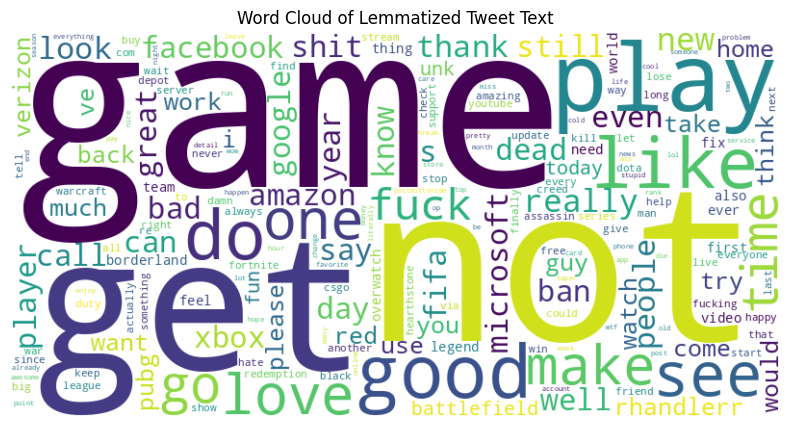

In [ ]:
# Combine all the lemmatized text data into a single string
all_lemma_text = " ".join(train_df["lemma_text"])

# Tokenize and count word frequencies (basic tokenization, can be improved)
# Remove non-alphabetic characters and convert to lowercase
words = re.findall(r'\b\w+\b', all_lemma_text.lower())
word_counts = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Lemmatized Tweet Text")
plt.show()

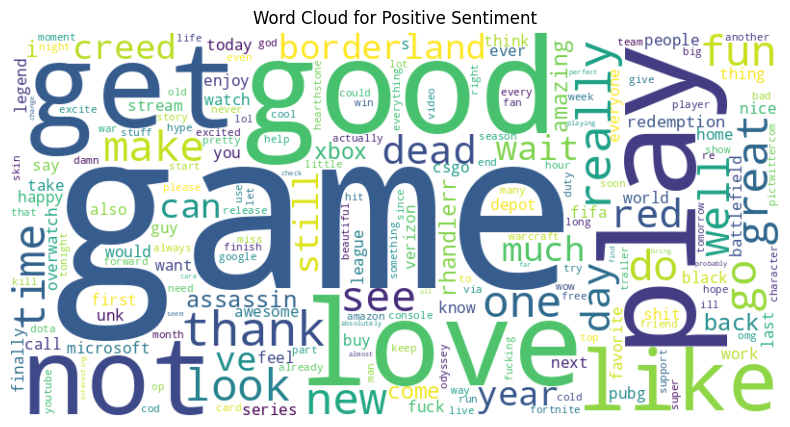

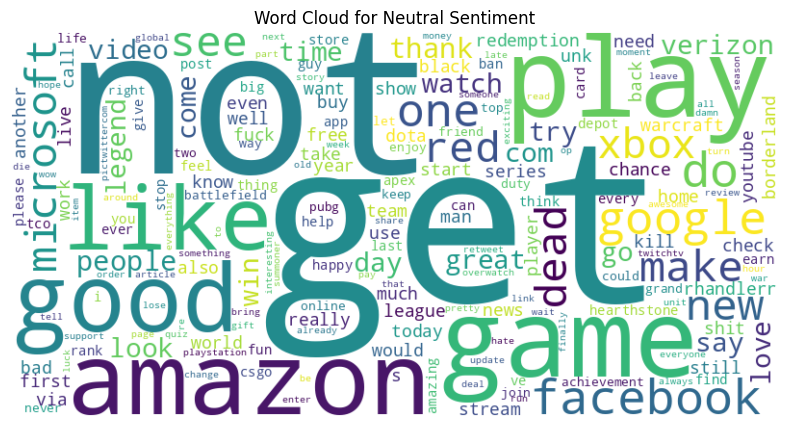

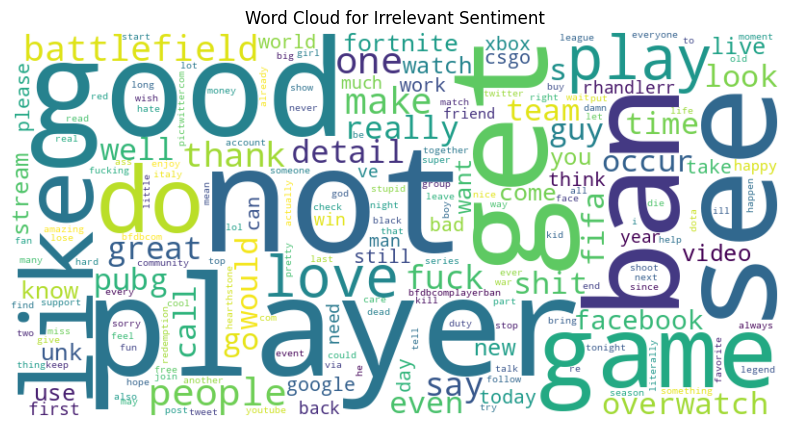

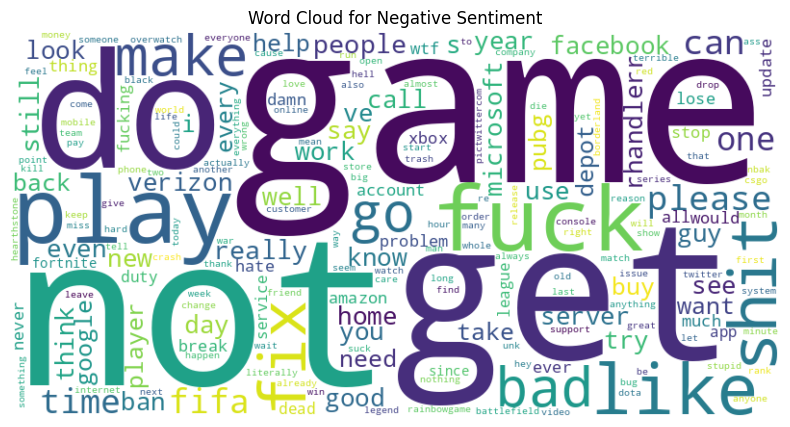

In [ ]:
# Get unique target labels
target_labels = train_df['target'].unique()

for label in target_labels:
    # Filter DataFrame for the current label
    label_df = train_df[train_df['target'] == label]

    # Combine all the lemmatized text data for the current label into a single string
    all_lemma_text_label = " ".join(label_df["lemma_text"])

    # Tokenize and count word frequencies (basic tokenization, can be improved)
    # Remove non-alphabetic characters and convert to lowercase
    words_label = re.findall(r'\b\w+\b', all_lemma_text_label.lower())
    word_counts_label = Counter(words_label)

    # Generate the word cloud
    wordcloud_label = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_label)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_label, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {label} Sentiment")
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
tfidf = TfidfVectorizer()

# X_bow = bow.fit_transform(train_df["lemma_text"])
X_tfidf = tfidf.fit_transform(train_df["lemma_text"])

# print("BOW Vocab Size", len(bow.vocabulary_))
print("TFIDF shape:", X_tfidf.shape)

TFIDF shape: (52085, 27139)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
train_df.columns

Index(['company', 'target', 'text', 'len_chars', 'noun_count', 'verb_count',
       'adj_count', 'lemma_text'],
      dtype='object')

In [ ]:
X = train_df[['text','noun_count','verb_count','adj_count']].copy()
y = train_df['target']

In [ ]:
# ColumnTransformer: text -> TFIDF ; numeric -> scaler passthrough
col_trans_tfidf = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=10000, preprocessor=clean_tweet), 'text'),
    ('num', StandardScaler(), ['noun_count','verb_count','adj_count'])
])

In [1]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Define three pipelines
pipe_lr_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', LogisticRegression(max_iter=2000))])
pipe_svc_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', LinearSVC(max_iter=2000))])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Fit and evaluate
for name, pipe in [('Logistic_TFIDF', pipe_lr_tfidf), ('LinearSVC_TFIDF', pipe_svc_tfidf)]: # Added Word2Vec pipeline
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(name, "acc:", accuracy_score(y_test, preds), "f1:", f1_score(y_test, preds, average="weighted"))

Logistic_TFIDF acc: 0.720168954593453 f1: 0.7177885019251895
LinearSVC_TFIDF acc: 0.7699913602764712 f1: 0.7687078574694707


In [ ]:
pipe_random_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', RandomForestClassifier(max_depth=2000))])
pipe_random_tfidf.fit(X_train, y_train)
preds = pipe_random_tfidf.predict(X_test)

In [ ]:
print("RandomForest", "acc:", accuracy_score(y_test, preds), "f1:", f1_score(y_test, preds, average="weighted"))

RandomForest acc: 0.8656043006623788 f1: 0.8651995017309301


Evaluation Report for Logistic Regression with TF-IDF
              precision    recall  f1-score   support

  Irrelevant       0.91      0.78      0.84      1973
    Negative       0.87      0.90      0.88      3041
     Neutral       0.84      0.88      0.86      2499
    Positive       0.86      0.88      0.87      2904

    accuracy                           0.87     10417
   macro avg       0.87      0.86      0.86     10417
weighted avg       0.87      0.87      0.87     10417



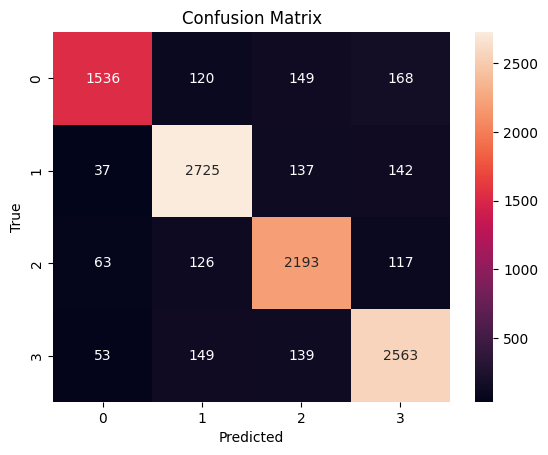

In [ ]:
print("Evaluation Report for Logistic Regression with TF-IDF")
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

In [ ]:
best_pipe = pipe_random_tfidf  # choose the best based on previous scores
joblib.dump(best_pipe, 'sentiment_model.pkl')

['sentiment_model.pkl']